# Notes służący wyłącznie do wstępnej analizy danych


In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import graph as gu


In [4]:
connections = pd.read_csv("connection_graph.csv", low_memory=False)
connections.head()

,Unnamed: 0,company,line,departure_time,arrival_time,start_stop,end_stop,start_stop_lat,start_stop_lon,end_stop_lat,end_stop_lon
0,0,MPK Autobusy,A,20:52:00,20:53:00,Zajezdnia Obornicka,Paprotna,51.148737,17.021069,51.147752,17.020539
1,1,MPK Autobusy,A,20:53:00,20:54:00,Paprotna,Obornicka (Wołowska),51.147752,17.020539,51.144385,17.023735
2,2,MPK Autobusy,A,20:54:00,20:55:00,Obornicka (Wołowska),Bezpieczna,51.144385,17.023735,51.141360,17.026376
3,3,MPK Autobusy,A,20:55:00,20:57:00,Bezpieczna,Bałtycka,51.141360,17.026376,51.136632,17.030617
4,4,MPK Autobusy,A,20:57:00,20:59:00,Bałtycka,Broniewskiego,51.136632,17.030617,51.135851,17.037383


Czas może być reprezentowany w postaci liczby całkowitej reprezentującej sekundy od godziny 00:00

In [5]:
stops = set(connections[['start_stop']+['start_stop_lat']+['start_stop_lon']].itertuples(index=False, name=None))
stops.update(set(connections[['end_stop']+['end_stop_lat']+['end_stop_lon']].itertuples(index=False, name=None)))
len(stops)
stops_df = pd.DataFrame(stops)

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
nodes = []
for stop in stops:
    nodes.append(gu.Node(*stop, []))


In [ ]:

ax = stops_df.plot.scatter(x=2, y=1, s=0.5)
ax.axes.set_aspect('equal')

In [22]:
graph = gu.Graph('connection_graph.csv')

In [9]:
k1 = list(graph.graph.keys())[-1]
n = graph.graph[k1]

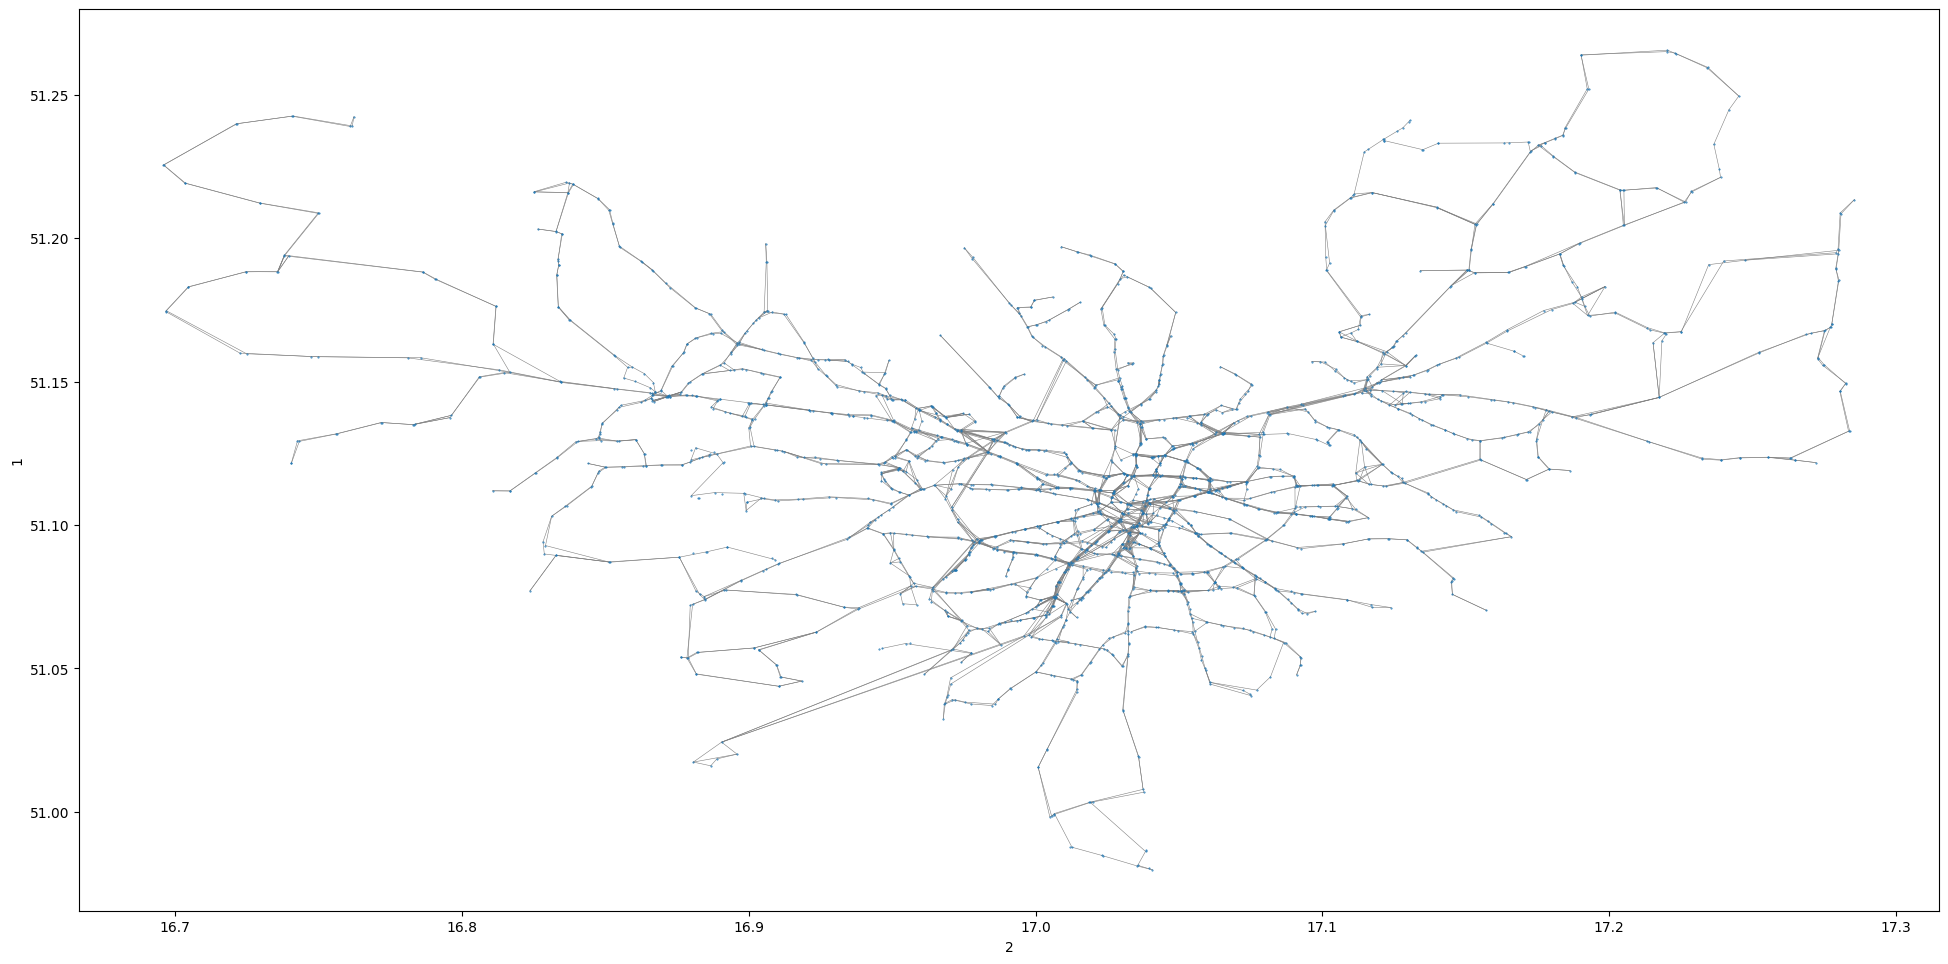

In [10]:

fig, ax = plt.subplots(figsize=(24, 18))
stops_df.plot.scatter(x=2, y=1, s=0.2, ax=ax)

def put(n: gu.Node, e: gu.Edge):
    if e in (n.neighbours):
        return n.longitude, e.dest.longitude, n.latitude, e.dest.latitude
    return None, None, None, None

# draw each unique connection
for x1, x2, y1, y2 in graph.distinct_edge_dfs(n, put):
    if x1:
        ax.plot([x1, x2], [y1, y2], c='gray', zorder=0.1, linewidth=0.4)


ax.set_aspect('equal') 
plt.show()

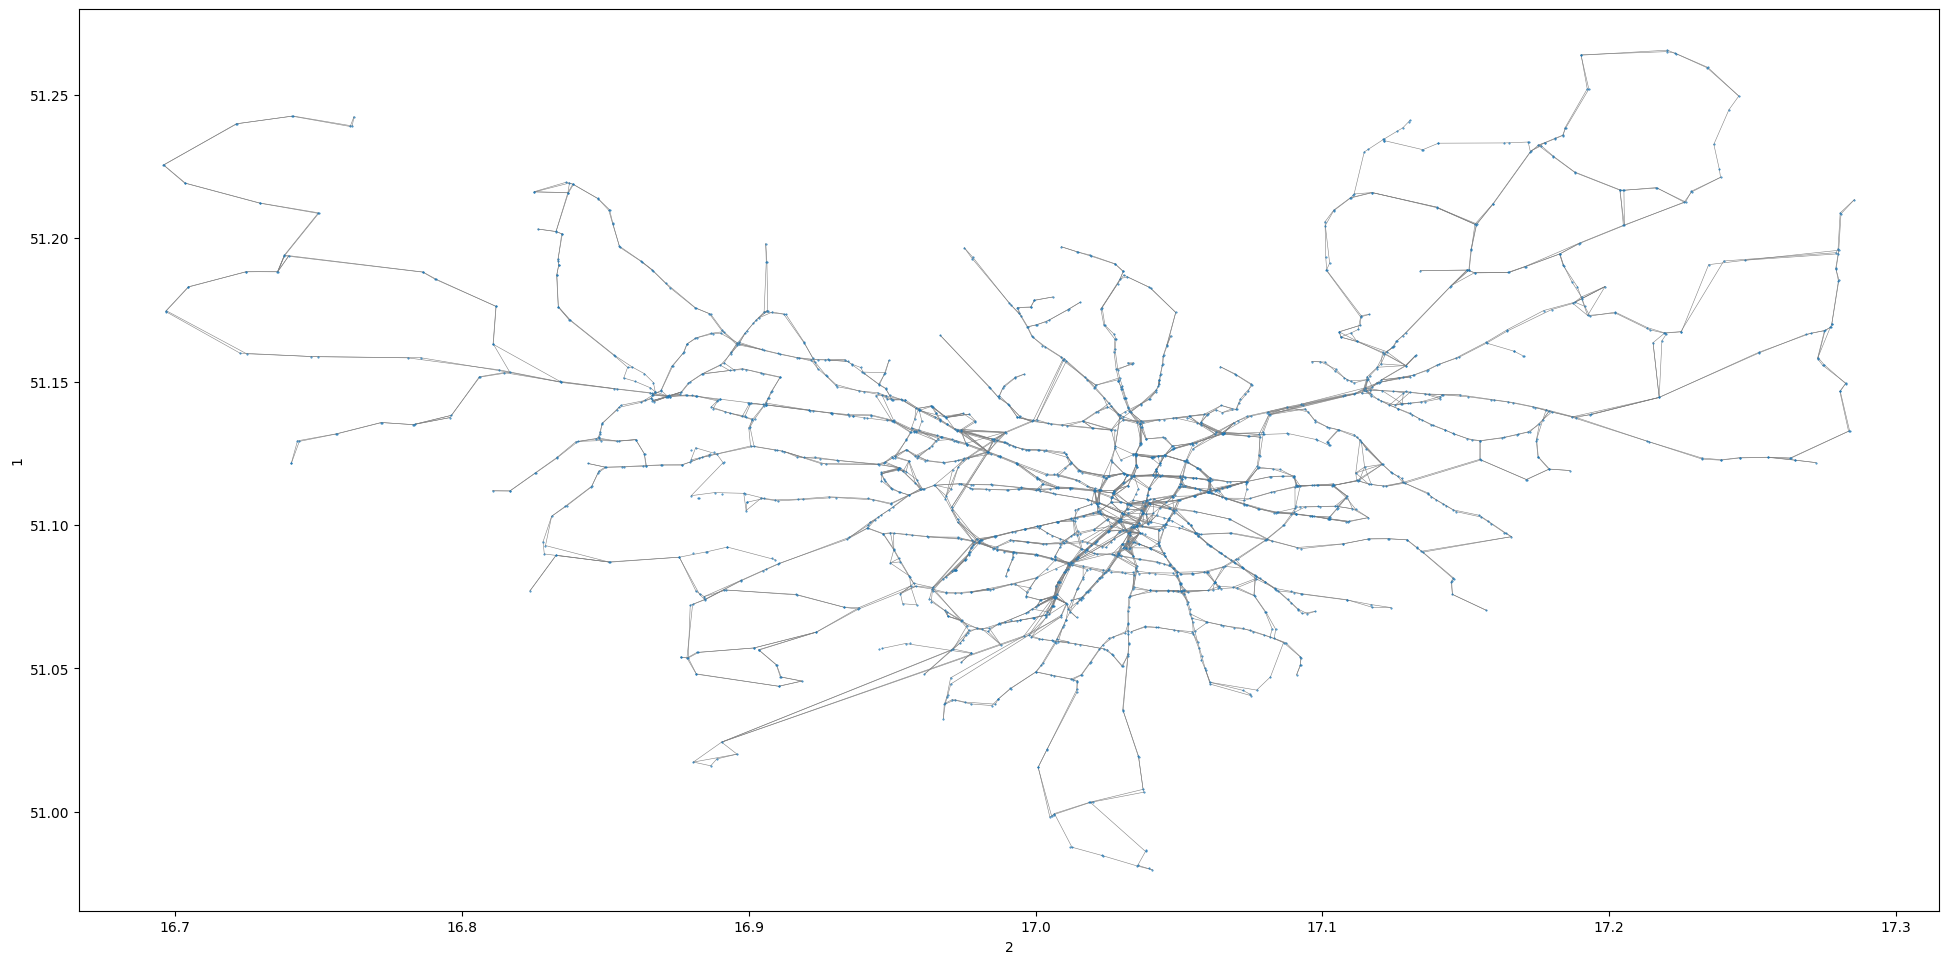

In [23]:
fig, ax = plt.subplots(figsize=(24, 18))
stops_df.plot.scatter(x=2, y=1, s=0.2, ax=ax)

def put(n: gu.Node, e: gu.Edge):
    if e in (n.neighbours):
        return n.longitude, e.dest.longitude, n.latitude, e.dest.latitude
    return None, None, None, None

# draw each unique connection
for x1, x2, y1, y2 in graph.distinct_edge_bfs(n, put):
    if x1:
        ax.plot([x1, x2], [y1, y2], c='gray', zorder=0.1, linewidth=0.4)


ax.set_aspect('equal') 
plt.show()